In [1]:
!pip install wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=2c4caadc8a16d131ef2b0e6d87eaacecec53eaec3be0960e9572858ab79969fa
  Stored in directory: /root/.cache/pip/wheels/33/3c/79/b36253689d838af4a0539782853ac3cc38a83a6591ad570dde
Successfully built wikipedia-api


In [2]:
import requests
from bs4 import BeautifulSoup
import wikipediaapi
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation


In [3]:
# Descargar stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Lista ampliada de mujeres científicas
mujeres_cientificas = [
    "Marie Curie", "Rosalind Franklin", "Ada Lovelace", "Dorothy Crowfoot Hodgkin", "Barbara McClintock",
    "Lise Meitner", "Rachel Carson", "Emmanuelle Charpentier", "Jennifer Doudna", "Jane Goodall",
    "Vera Rubin", "Chien-Shiung Wu", "Maria Goeppert-Mayer", "Gertrude B. Elion", "Françoise Barré-Sinoussi",
    "Tu Youyou", "May-Britt Moser", "Christiane Nüsslein-Volhard", "Rita Levi-Montalcini", "Elizabeth Blackburn",
    "Carol W. Greider", "Margaret Hamilton", "Katherine Johnson", "Dorothy Vaughan", "Mary Jackson",
    "Flossie Wong-Staal", "Lynn Margulis", "Barbara Liskov", "Shirley Ann Jackson", "Eleanor Anne Ormerod",
    "Mary Anning", "Hypatia de Alejandría", "Sophie Germain", "Emilie du Châtelet", "Maria Mitchell",
    "Henrietta Swan Leavitt", "Annie Jump Cannon", "Cecilia Payne-Gaposchkin", "Lise Meitner",
    "Marie Tharp", "Jocelyn Bell Burnell", "Gerty Cori", "Dorothy Crowfoot Hodgkin", "Rosalyn Yalow",
    "Jean Purdy", "Margarita Salas", "Ángela Ruiz Robles", "Susan Solomon", "Patricia Bath",
    "Tu Youyou", "Françoise Barré-Sinoussi", "May-Britt Moser", "Christiane Nüsslein-Volhard"
]


In [5]:
# Configuración de Wikipedia
wiki_wiki = wikipediaapi.Wikipedia(language='es',
                                 user_agent='my_bot/1.0 (My_bot_description; my_email@example.com)') # Provide a descriptive user agent

def obtener_descripcion(nombre):
    """Obtiene la primera sección del artículo de Wikipedia de la científica."""
    try:
        page = wiki_wiki.page(nombre)
        if page.exists():
            return page.summary
        else:
            return None
    except Exception as e:
        print(f"Error obteniendo {nombre}: {e}")
        return None

In [6]:
# Obtener descripciones
descripciones = {nombre: obtener_descripcion(nombre) for nombre in mujeres_cientificas}

In [7]:
descripciones


{'Marie Curie': 'Maria Salomea Skłodowska-Curie,\u200b\u200b más conocida como Marie Curie\u200b\u200b o Madame Curie (Varsovia, 7 de noviembre de 1867-Passy, 4 de julio de 1934), fue una física y química de origen polaco. Pionera en el campo de la radiactividad, es la primera y única persona en recibir dos premios Nobel en distintas especialidades científicas: Física y Química.\u200b También fue la primera mujer en ocupar el puesto de profesora en la Universidad de París y la primera en recibir sepultura con honores en el Panteón de París por méritos propios en 1995.\u200b\nNació en Varsovia, en lo que entonces era el Zarato de Polonia (territorio administrado por el Imperio ruso). Estudió clandestinamente en la «universidad flotante» de Varsovia y comenzó su formación científica en dicha ciudad. En 1891, a los 24 años, siguió a su hermana mayor Bronisława Dłuska a París, donde culminó sus estudios y llevó a cabo sus trabajos científicos más sobresalientes. Compartió el premio Nobel d

In [8]:
# Crear DataFrame
df = pd.DataFrame(descripciones.items(), columns=['Nombre', 'Descripcion'])
df.dropna(inplace=True)

In [9]:
# Preprocesamiento del texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúüñ ]', '', texto)
    palabras = texto.split()
    palabras = [p for p in palabras if p not in stop_words]
    return " ".join(palabras)

df['Descripcion'] = df['Descripcion'].apply(limpiar_texto)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Descargar stopwords en español
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')

# Vectorización con stopwords en español
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=spanish_stopwords)
X_tfidf = tfidf_vectorizer.fit_transform(df['Descripcion'])


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [29]:
# Calcular distancia del coseno
cosine_sim = cosine_similarity(X_tfidf)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

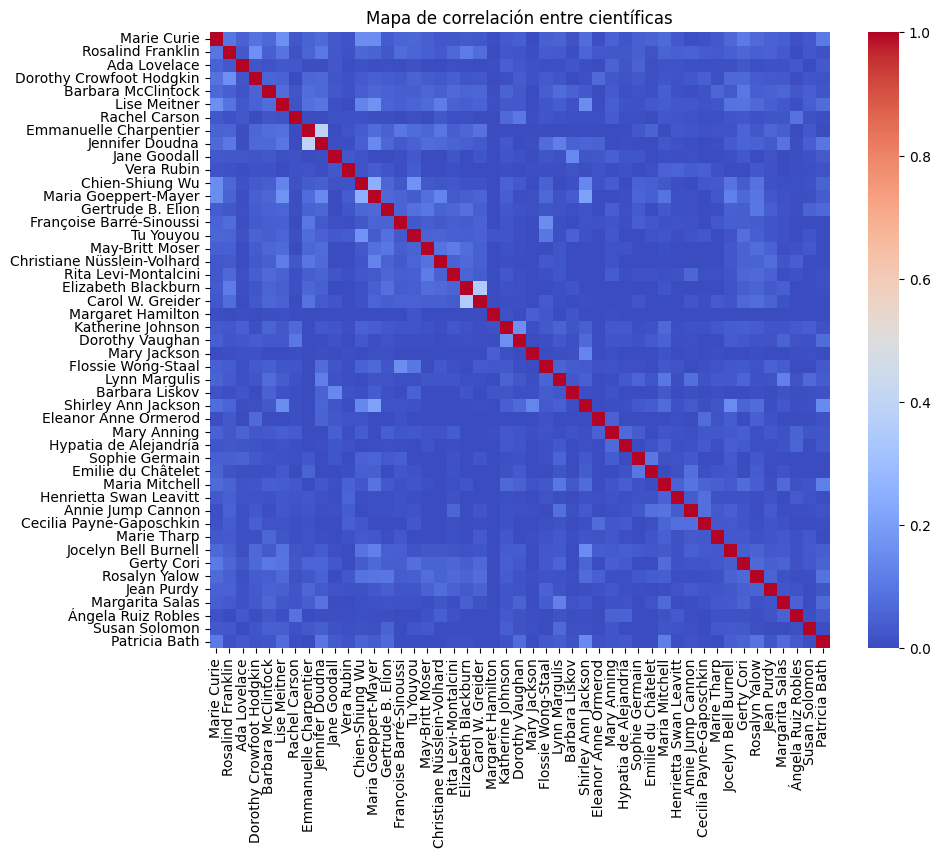

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [30]:
# Heatmap de la matriz de similitud
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=False, cmap='coolwarm', xticklabels=df['Nombre'], yticklabels=df['Nombre'])
plt.title("Mapa de correlación entre científicas")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [31]:
# Cálculo de top modeling mediante LDA
# Se elige un número de tópicos. Puedes ajustar este número según los resultados.
n_topics = 10

# Inicializar el modelo LDA
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)

# Ajustar el modelo a los datos TF-IDF
lda.fit(X_tfidf)

# Mostrar los tópicos encontrados
print("Temas encontrados por LDA:")
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Tema #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Temas encontrados por LDA:
Tema #1:
moser noruega edvard universidad caso células nobel premio nombrada evolutiva
Tema #2:
julio entomóloga gloucestershire ormerod eleanor anne gerty cori carl primera
Tema #3:
hamilton números vih bell primera burnell ada teoría primos germain
Tema #4:
octubre alemana christiane nüssleinvolhard ganadora inventora alemania medicina bióloga desarrollo
Tema #5:
purdy física premio nobel proponer katowice capas teórica goeppertmayer steptoe
Tema #6:
jackson elizabeth wu estadounidensemary estrellas maíz cefeidas libro hipatia física
Tema #7:
jane barbara física liskov doctorado chtelet émilie crecimiento chimpancés hallazgos
Tema #8:
premio química nobel china bioquímica método diciembre cristalografía utilizada juvisysurorge
Tema #9:
atmosférica estadounidense química investigadora oceánica administración solomon trabajado california susan
Tema #10:
meitner hormonas lasker doctoral premio cambridge hahn otto astronomía cecilia


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [32]:
!pip install pyLDAvis==3.4.1 numpy==2.0.2 scipy>=1.14.0

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcno

In [13]:
!pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
